In [1]:
import matplotlib.pyplot as plt
import numpy as np
from xarray import DataArray

from weldx import Q_, GenericSeries, LinearHorizontalTraceSegment, Trace
from weldx.core import SpatialSeries
from weldx.geometry import DynamicTraceSegment

## Discrete

In [2]:
data = DataArray(
    Q_([[0, 0, 0], [0, 5, 0], [1, 5, 0], [1, 9, 0]], "mm"),
    dims=["s", "c"],
    coords=dict(
        c=["x", "y", "z"],
        s=DataArray(Q_([0, 0.5, 0.6, 1], ""), dims=["s"]).pint.dequantify(),
    ),
)
series_disc = SpatialSeries(data)

In [3]:
segment_disc = DynamicTraceSegment(series_disc)

In [4]:
segment_disc.local_coordinate_system(0.55)

C:\Users\vhirtham\Miniconda3\envs\weldx\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
C:\Users\vhirtham\Miniconda3\envs\weldx\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")


<LocalCoordinateSystem>
Dimensions:      (c: 3, v: 3)
Coordinates:
  * c            (c) <U1 'x' 'y' 'z'
  * v            (v) int32 0 1 2
Data variables:
    orientation  (v, c) float64 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0
    coordinates  (c) float64 [mm] 0.5 5.0 0.0

In [5]:
trace_disc = Trace([segment_disc, segment_disc])

C:\Users\vhirtham\Miniconda3\envs\weldx\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
C:\Users\vhirtham\Miniconda3\envs\weldx\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")
C:\Users\vhirtham\Miniconda3\envs\weldx\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
C:\Users\vhirtham\Miniconda3\envs\weldx\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to Float64Inde

C:\Users\vhirtham\Miniconda3\envs\weldx\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
C:\Users\vhirtham\Miniconda3\envs\weldx\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")
C:\Users\vhirtham\Miniconda3\envs\weldx\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
C:\Users\vhirtham\Miniconda3\envs\weldx\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to Float64Inde

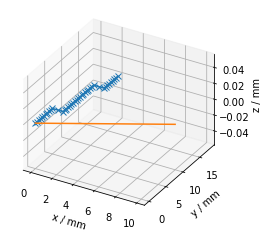

In [6]:
trace_disc.plot("0.5mm")
ax = plt.gca()
ax.plot([0, 10], [0, 10])

## Expression

In [7]:
expr = "a*sin(s)+b*cos(s)+c*s/10+d "
# expr = "x+y+z"
params = dict(
    a=DataArray(Q_([1, 0, 0], "mm"), dims=["c"], coords=dict(c=["x", "y", "z"])),
    b=DataArray(Q_([0, 1, 0], "mm"), dims=["c"], coords=dict(c=["x", "y", "z"])),
    c=DataArray(Q_([0, 0, 2], "mm"), dims=["c"], coords=dict(c=["x", "y", "z"])),
    d=DataArray(Q_([0, -1, 0], "mm"), dims=["c"], coords=dict(c=["x", "y", "z"])),
)
sps = SpatialSeries(expr, parameters=params)

In [8]:
segment = DynamicTraceSegment(sps, 2 * np.pi)

AttributeError: 'DynamicTraceSegment' object has no attribute '_derivative'

In [ ]:
trace = Trace([segment, segment, segment])

In [ ]:
trace.plot("0.1mm")

In [ ]:
trace.length

In [ ]:
from weldx import LocalCoordinateSystem
from weldx.visualization.matplotlib_impl import (
    axes_equal,
    draw_coordinate_system_matplotlib,
)

num_lcs = 11
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
for i in range(num_lcs):
    lcs = segment.local_coordinate_system(i / (num_lcs - 1))
    lcs = LocalCoordinateSystem(lcs.orientation, lcs.coordinates.data.m)
    draw_coordinate_system_matplotlib(lcs, ax)
axes_equal(ax)